# Topic Modelling and EDA

Full transparency: this section was very rushed, all code was copied from [here](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/).

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("pseudo/pseudolab.csv")
df

,sentence,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal,text
0,In 2019 a wave of anti-abortion laws swept thi...,6.635360,-2.915717,-0.175175,1.890639,-2.265393,-2.164053,-0.640354,In 2019 a wave of anti-abortion laws swept thi...
1,But these grabbed the public’s attention in a ...,-0.422903,-1.966259,0.220908,0.146967,-3.457461,-0.901608,6.126251,In 2019 a wave of anti-abortion laws swept thi...
2,Georgia banned abortion after about six weeks ...,1.859675,-3.230959,-0.389729,6.427304,-1.808647,-3.455705,-0.482240,In 2019 a wave of anti-abortion laws swept thi...
3,"Ohio, Mississippi, Louisiana and Kentucky did ...",0.327022,-2.367975,-1.594195,7.579478,-1.537600,-3.283216,-0.565419,In 2019 a wave of anti-abortion laws swept thi...
4,"Alabama went the furthest, banning virtually a...",6.683917,-2.563557,-0.671641,1.514271,-2.902210,-1.887146,-0.006093,In 2019 a wave of anti-abortion laws swept thi...
...,...,...,...,...,...,...,...,...,...
28359,"Jim Justice of West Virginia, a Republican, sa...",-0.826471,-2.144290,-0.996875,8.095543,-1.530808,-3.267610,-0.607475,WASHINGTON — The Biden administration has claw...
28360,The Biden administration had hoped to avoid sh...,3.889133,-3.152361,1.242280,2.615246,-2.932186,-2.632563,0.941492,WASHINGTON — The Biden administration has claw...
28361,"Late last year, the White House persuaded Ariz...",5.278596,-2.919935,-0.322822,2.819602,-2.090031,-2.463582,-0.311356,WASHINGTON — The Biden administration has claw...
28362,Yet administration officials are less concerne...,-0.367214,-2.063666,0.582598,0.422793,-3.704168,-1.220427,6.007252,WASHINGTON — The Biden administration has claw...


In [9]:
corpus = df.text.drop_duplicates()
corpus

0        In 2019 a wave of anti-abortion laws swept thi...
39       When Chris Lawson began dating Alexandra Salam...
114      KABUL, Afghanistan — A young boy died on Frida...
134      On Aug. 10, 2021, days before the collapse of ...
192      BRUNSWICK, Ga. — Defense lawyers in the hate c...
                               ...                        
28099    Like many older cities, Plainfield, N.J., went...
28148    Lesley and Chris Jones see a bit of North Ferr...
28199    After pulling off a notable second act of rein...
28286    Floral Park, about two miles from downtown San...
28335    WASHINGTON — The Biden administration has claw...
Name: text, Length: 515, dtype: object

## Latent Dirirchlet Allocation (LDA)
Latent Dirichlet Allocation is a statistical and graphical model which are used to obtain relationships between multiple documents in a corpus. It is developed using Variational Exception Maximization (VEM) algorithm for obtaining the maximum likelihood estimate from the whole corpus of text. Traditionally, this can be solved by picking out the top few words in the bag of words. However this completely lack the semantics in the sentence. This model follows the concept that each document can be described by the probabilistic distribution of topics and each topic can be described by the probabilistic distribution of words. Thus we can get a much clearer vision about how the topics are connected.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df.sentence)

number_topics = 5

lda = LDA(n_components=number_topics)
lda.fit(count_data)

LatentDirichletAllocation(n_components=5)

## Non Negative Matrix Factorization
NMF is a matrix factorization method where we make sure that the elements of the factorized matrices are non-negative. Consider the document-term matrix obtained from a corpus after removing the stopwords. The matrix can be factorized into two matrices term-topic matrix and topic-document matrix. There are many optimization models to perform the matrix factorization. Hierarchical Alternating Least Square is a faster and better way to perform NMF. Here the factorization occurs by updating one column at a time while keeping the other columns as constant.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_features=2000, min_df=10, stop_words='english')
 
vectorized_data = vectorizer.fit_transform(corpus)

nmf = NMF(n_components=20, solver="mu")
 
W = nmf.fit_transform(vectorized_data)

C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


## LSA

Latent Semantic Analysis, or LSA, is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

documents = corpus
  
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=100,         # num dimensions
                         algorithm='randomized',
                         n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(documents)

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents

## ACTUAL LDA SPAM

In [16]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess #lemmatize, 
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [17]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = corpus.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['in', 'wave', 'of', 'anti', 'abortion', 'laws', 'swept', 'this', 'country', 'common', 'enough', 'event', 'in', 'the', 'united', 'states', 'where', 'hundreds', 'of', 'such', 'laws', 'have', 'passed', 'during', 'the', 'last', 'decade', 'but', 'these', 'grabbed', 'the', 'public', 'attention', 'in', 'way', 'many', 'others', 'hadn', 'georgia', 'banned', 'abortion', 'after', 'about', 'six', 'weeks', 'of', 'pregnancy', 'or', 'about', 'two', 'weeks', 'after', 'missed', 'menstrual', 'period', 'ohio', 'mississippi', 'louisiana', 'and', 'kentucky', 'did', 'the', 'same', 'while', 'missouri', 'banned', 'the', 'procedure', 'at', 'eight', 'weeks', 'alabama', 'went', 'the', 'furthest', 'banning', 'virtually', 'all', 'abortions', 'in', 'the', 'state', 'though', 'most', 'of', 'these', 'laws', 'were', 'quickly', 'blocked', 'by', 'the', 'courts', 'they', 'were', 'obviously', 'under', 'roe', 'wade', 'the', 'backlash', 'to', 'their', 'passing', 'was', 'intense', 'especially', 'in', 'georgia', 'major', 'hu

In [21]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [22]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.012*"percent" + 0.011*"city" + 0.011*"state" + 0.007*"country" + '
  '0.007*"people" + 0.007*"accord" + 0.005*"official" + 0.005*"month" + '
  '0.005*"include" + 0.005*"town"'),
 (1,
  '0.012*"artist" + 0.011*"gay" + 0.007*"show" + 0.007*"comedy" + 0.007*"art" '
  '+ 0.005*"write" + 0.005*"luz" + 0.005*"book" + 0.005*"film" + '
  '0.005*"character"'),
 (2,
  '0.009*"home" + 0.006*"year" + 0.006*"time" + 0.005*"first" + 0.005*"house" '
  '+ 0.004*"work" + 0.004*"look" + 0.004*"live" + 0.004*"area" + 0.004*"new"'),
 (3,
  '0.011*"people" + 0.007*"time" + 0.006*"work" + 0.005*"school" + 0.005*"new" '
  '+ 0.004*"find" + 0.004*"year" + 0.004*"life" + 0.004*"child" + '
  '0.004*"pandemic"')]


In [23]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6758,"people, time, work, school, new, find, year, l...","[wave, anti_abortion, law, sweep, country, com..."
1,1,3.0,0.8440,"people, time, work, school, new, find, year, l...","[begin, date, woman, eventually, become, partn..."
2,2,0.0,0.4268,"percent, city, state, country, people, accord,...","[young, boy, die, trap, well, several, day, so..."
3,3,0.0,0.6479,"percent, city, state, country, people, accord,...","[day, collapse, arrive, begin, new, life, prev..."
4,4,1.0,0.3996,"artist, gay, show, comedy, art, write, luz, bo...","[brunswick, ga, defense_lawyer, hate, crime, t..."
5,5,3.0,0.6728,"people, time, work, school, new, find, year, l...","[spring, philip, pham, people, country, online..."
6,6,3.0,0.6235,"people, time, work, school, new, find, year, l...","[early, way, terrible, first, year, disease, h..."
7,7,0.0,0.5702,"percent, city, state, country, people, accord,...","[invade, live, interview, topic, ask, possible..."
8,8,2.0,0.5641,"home, year, time, first, house, work, look, li...","[show, cafe, wear, vintage, christian, dior, s..."
9,9,0.0,0.3491,"percent, city, state, country, people, accord,...","[royal, family, scandal, rotate, member, nearl..."


In [24]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8935,"percent, city, state, country, people, accord, official, month, include, town","[identify, commercial, private, aircraft, violate, export, control, fly, owner, operator, servic..."
1,1.0,0.9970,"artist, gay, show, comedy, art, write, luz, book, film, character","[seguia, respirando, dormido, mese, sin, poder, medicamento, que, ayudaran, con, eso, porque, gu..."
2,2.0,0.9867,"home, year, time, first, house, work, look, live, area, new","[follow, live, coverage, winter, final, figure_skate, competition, open, pair, ice, short, progr..."
3,3.0,0.9478,"people, time, work, school, new, find, year, life, child, pandemic","[surprise, person, diagnosis, heart_disease, cancer, life, limit, life, threaten, physical, ailm..."


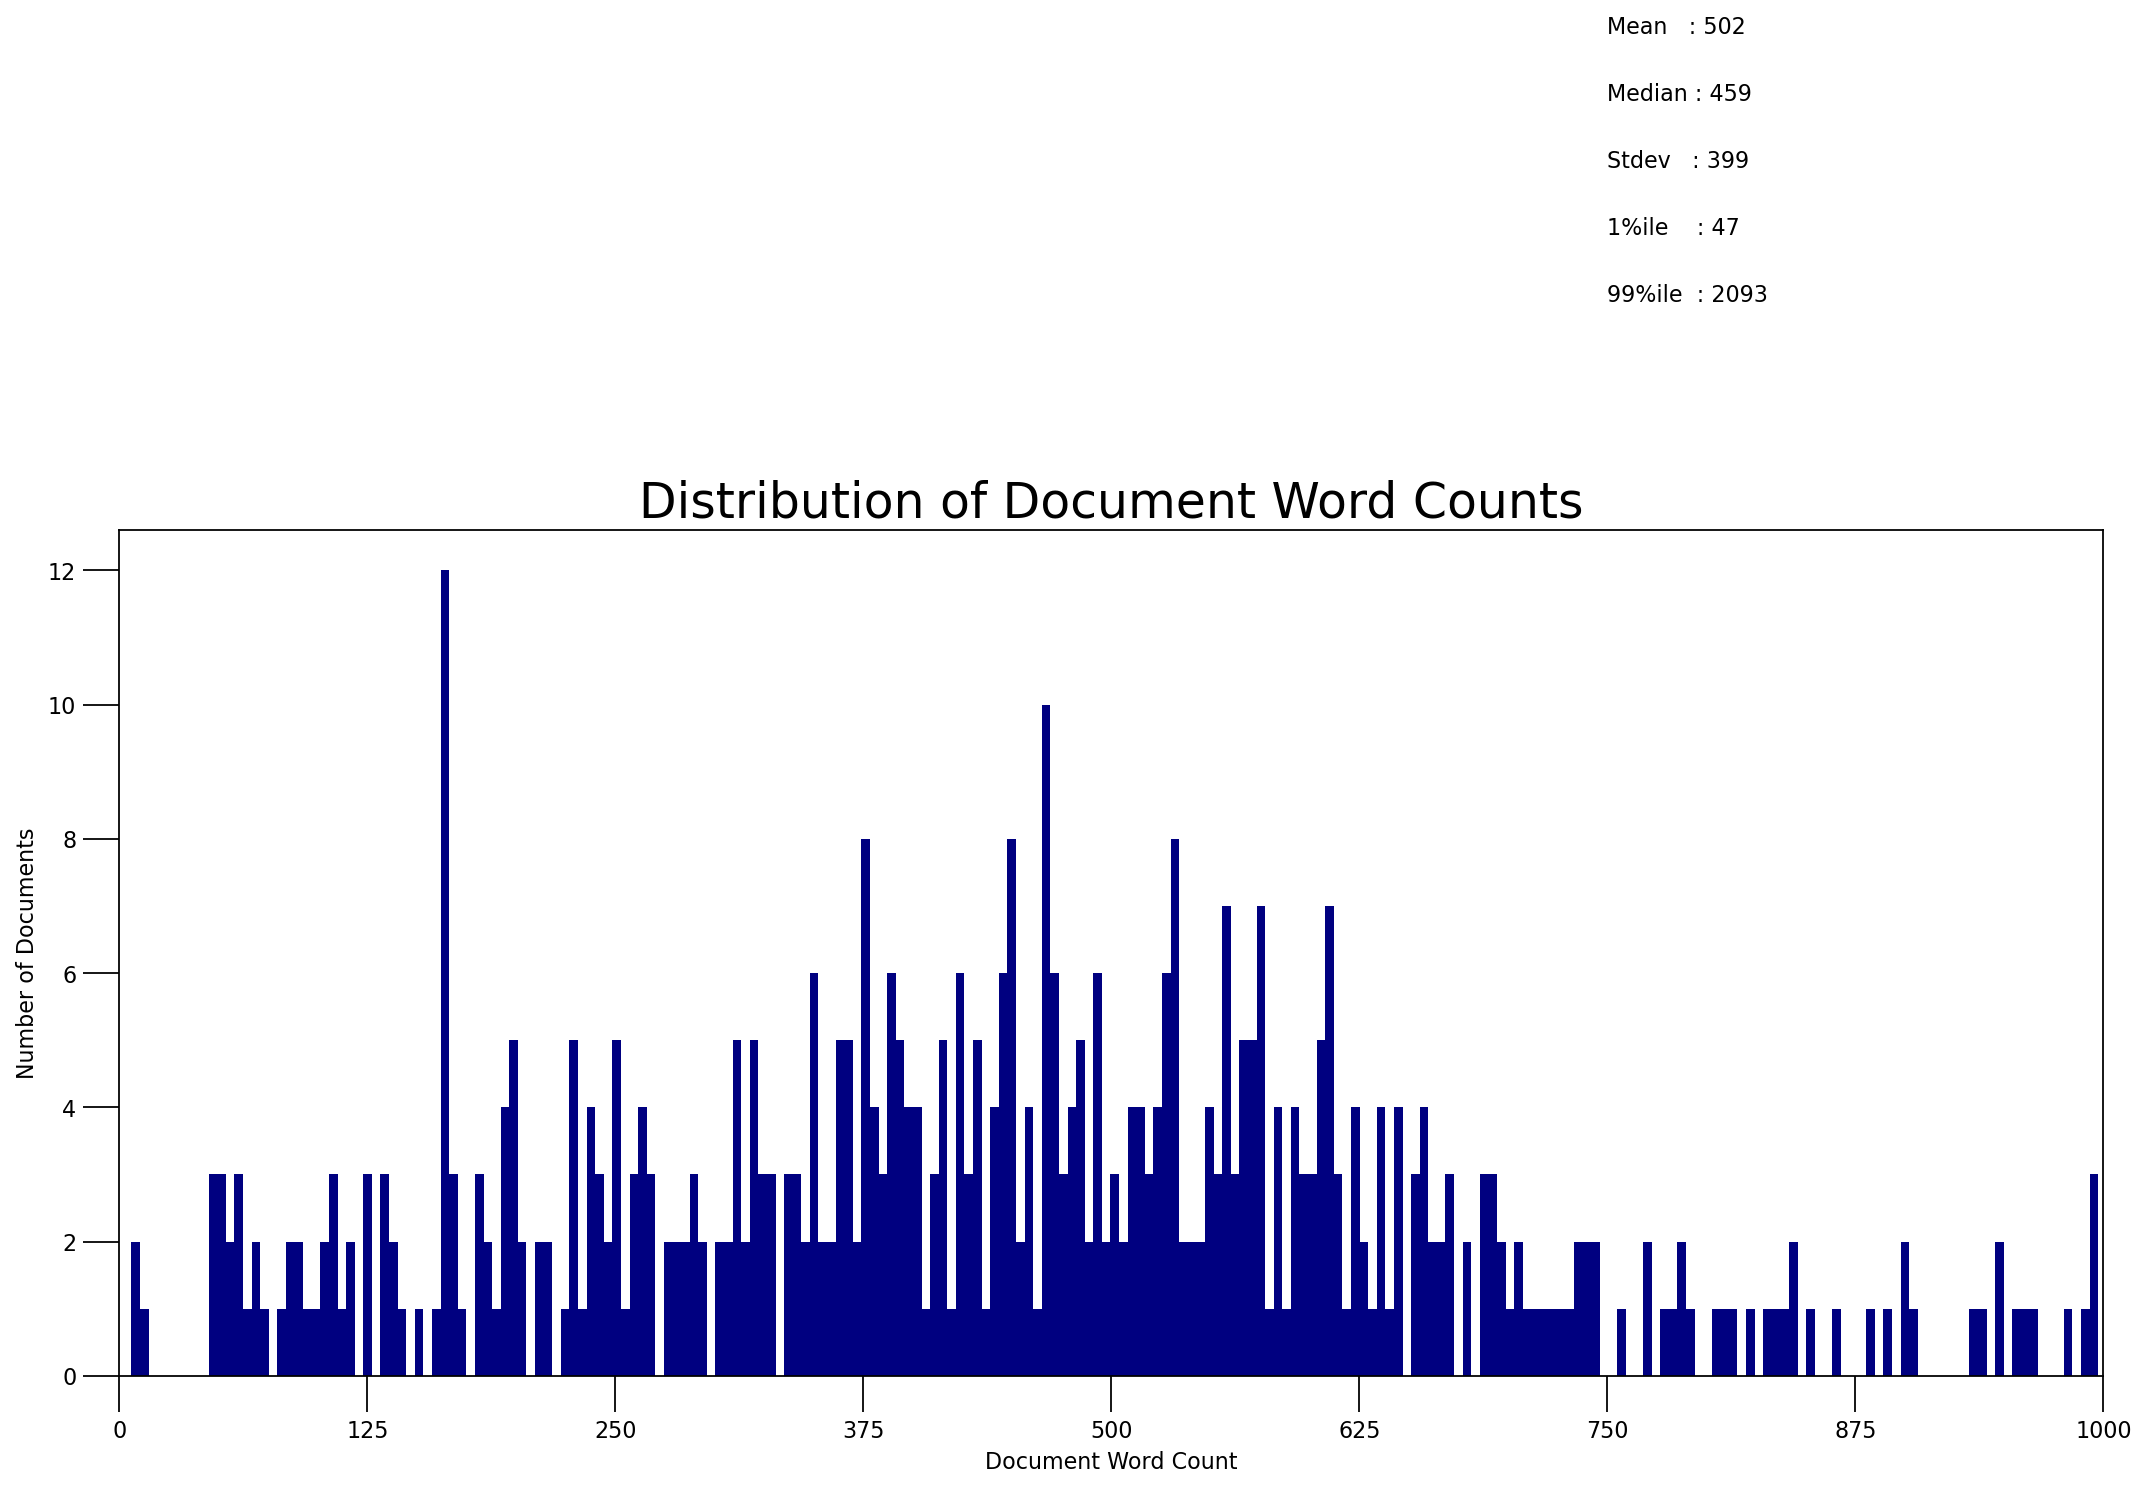

In [26]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 20, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  19, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  18, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  17, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  16, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

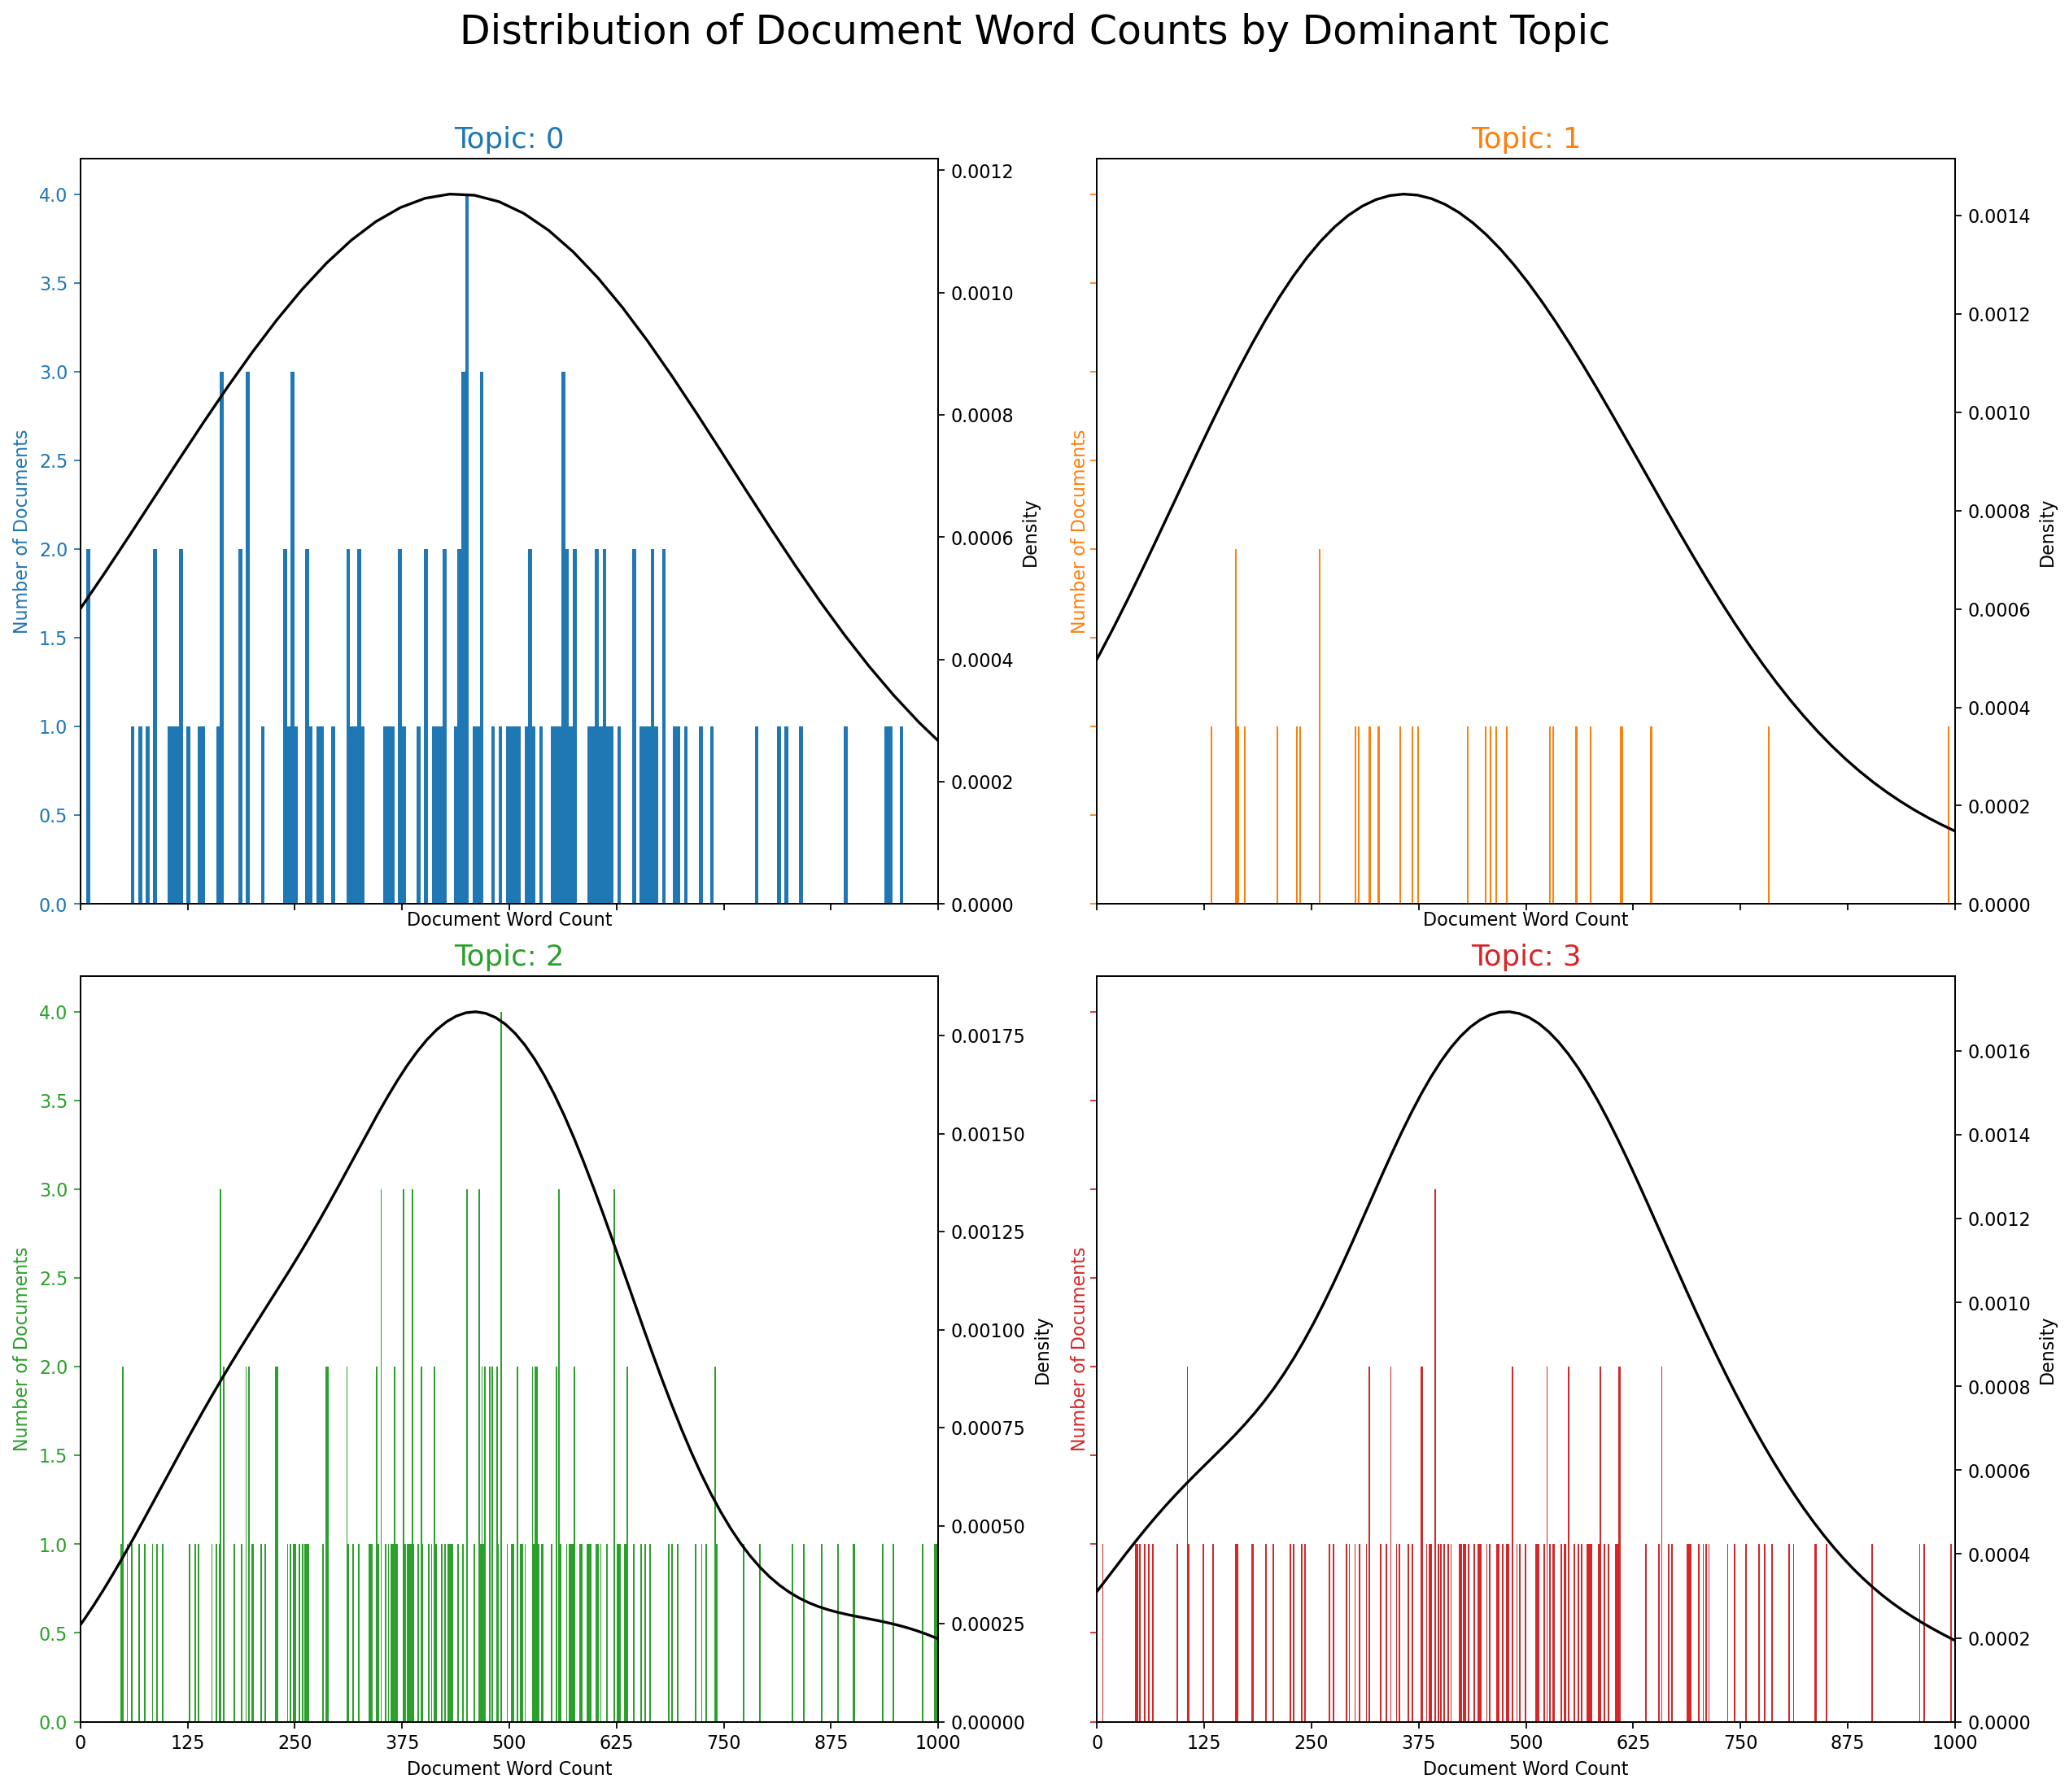

In [27]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

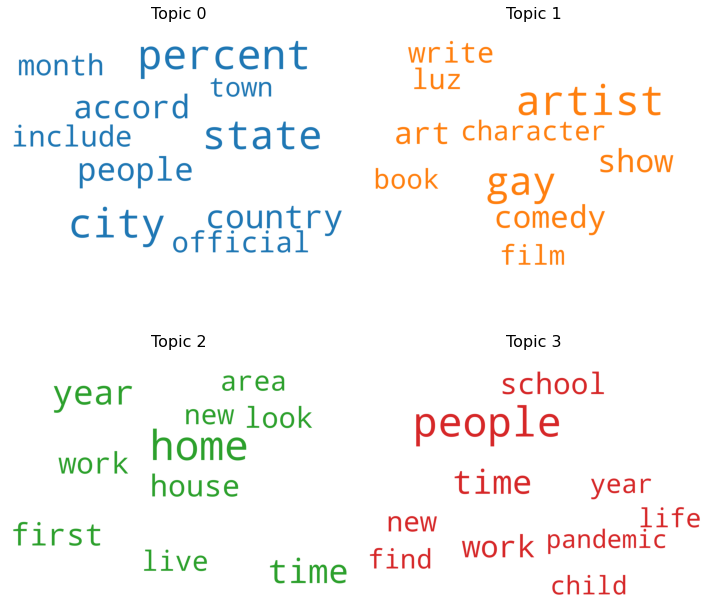

In [28]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\Prannaya\AppData\Local\Temp/ipykernel_15860/2855870167.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


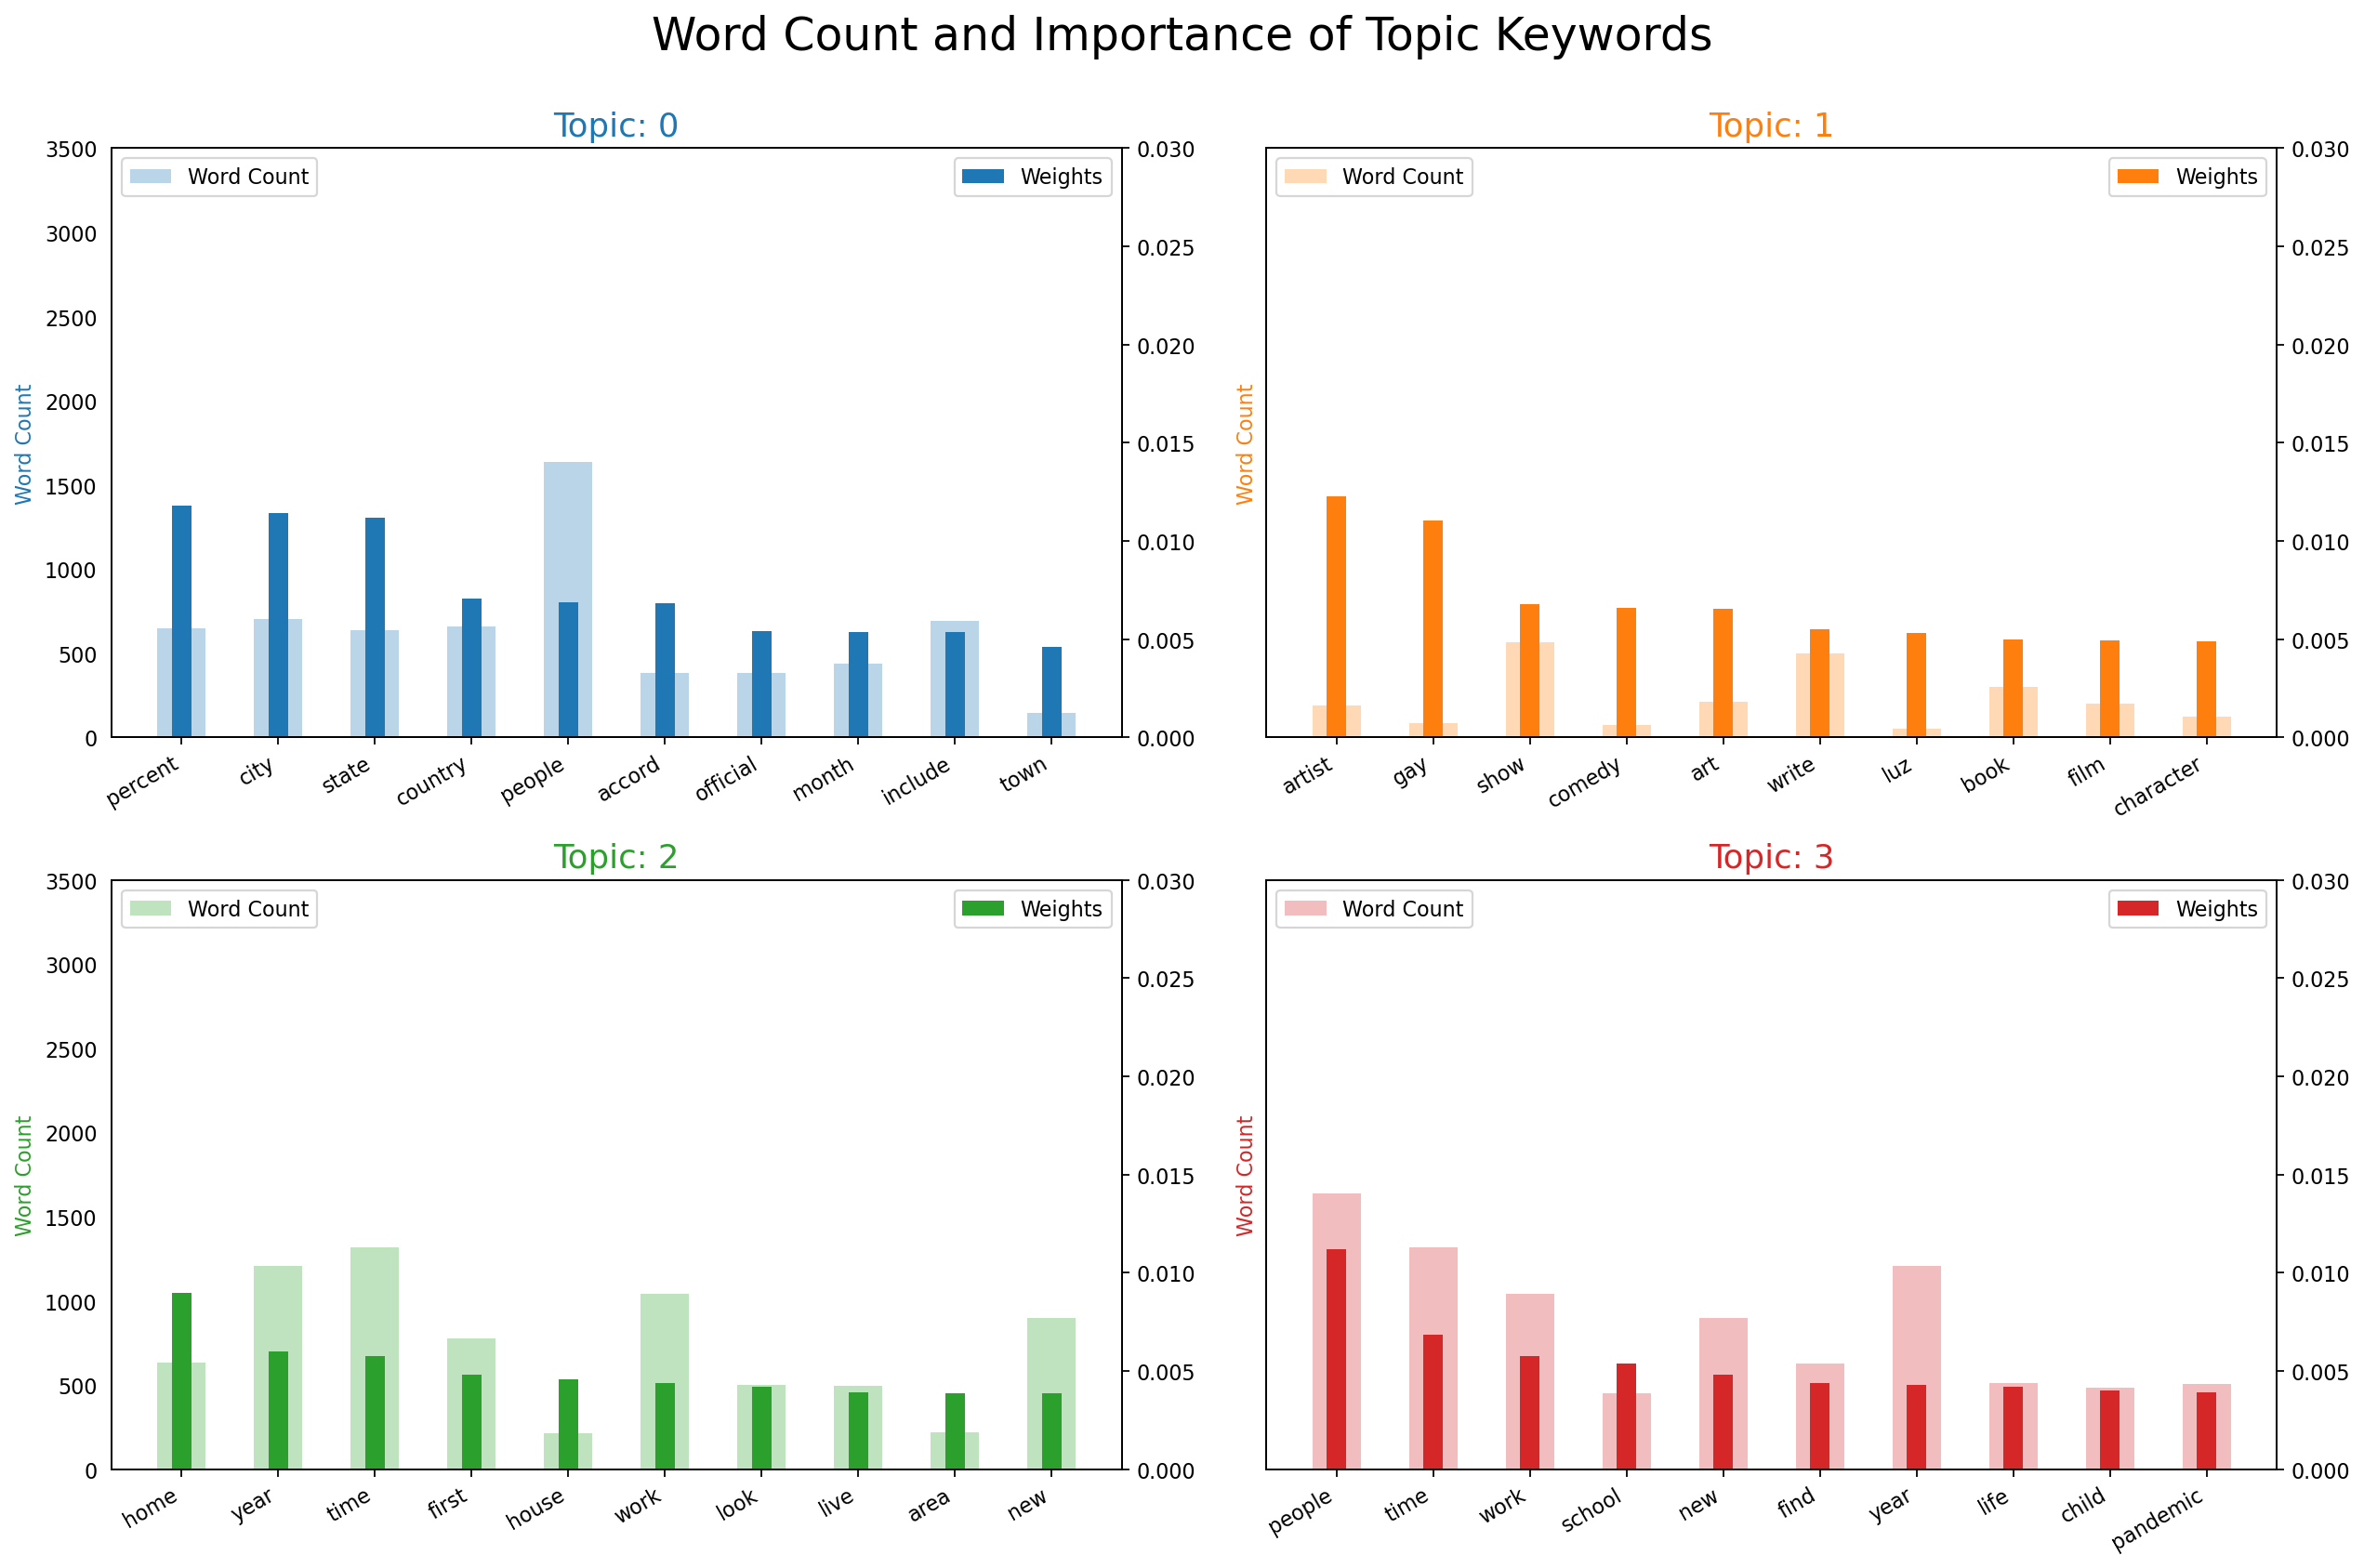

In [29]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

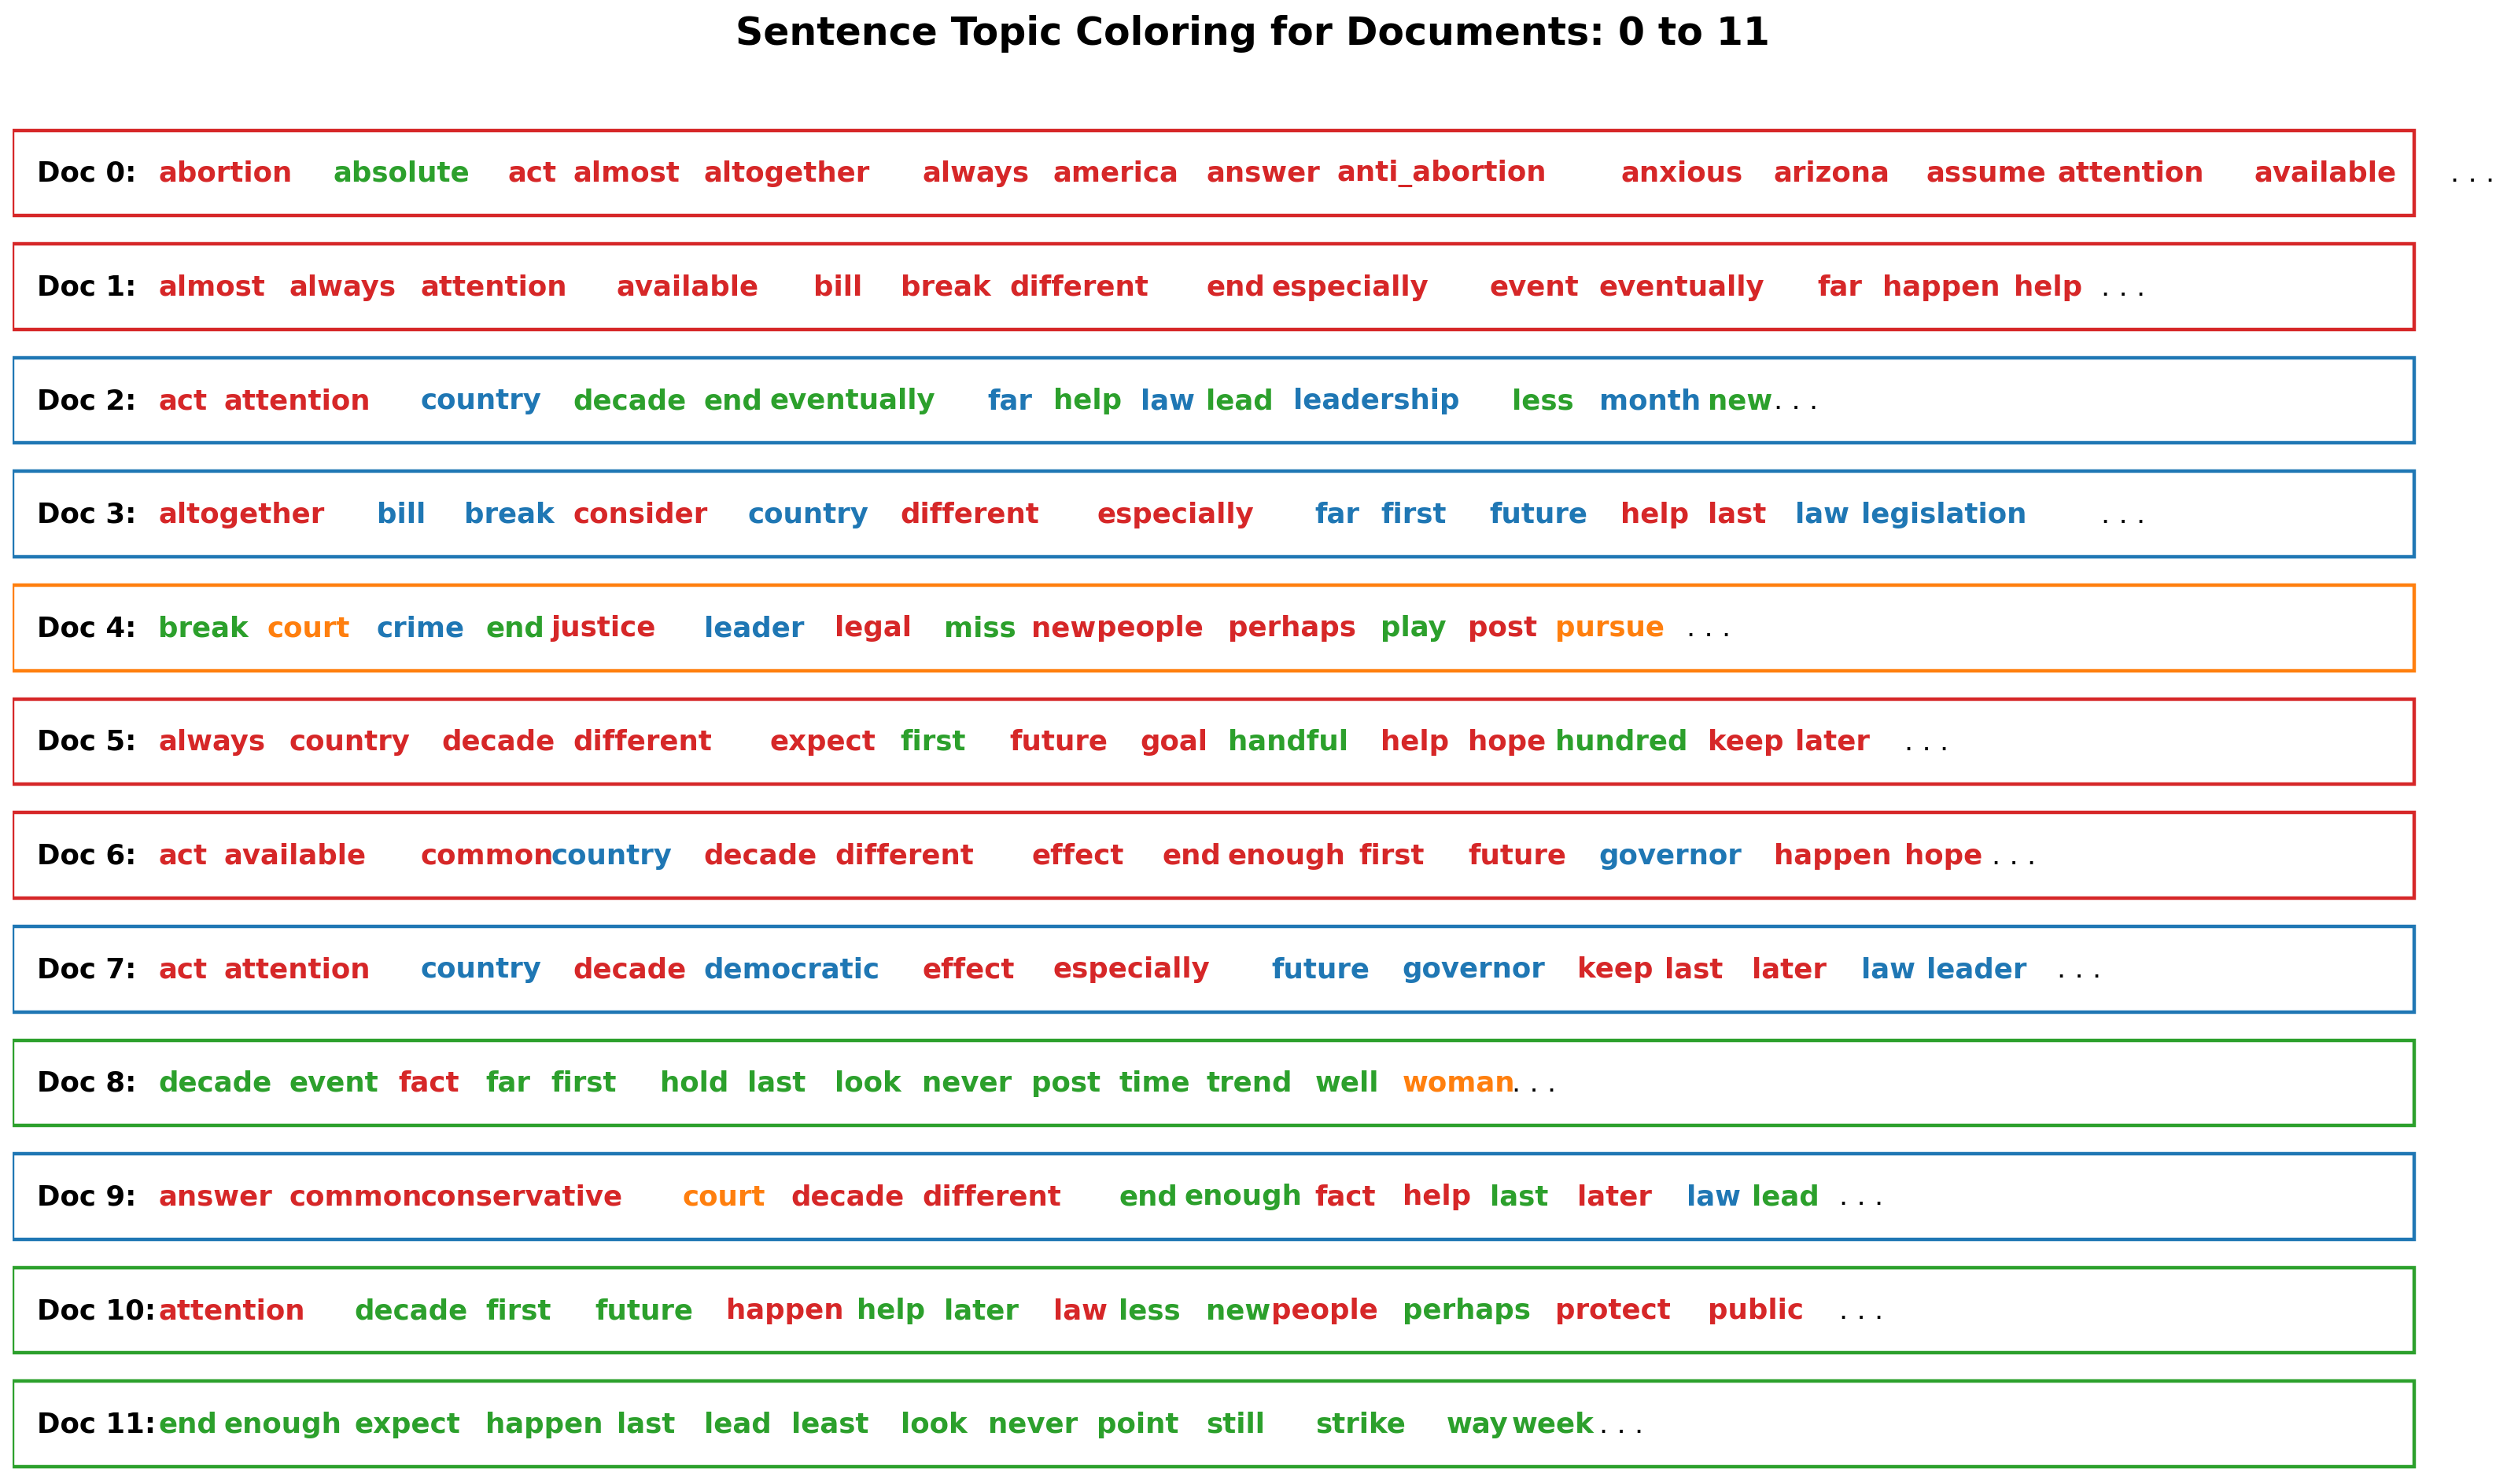

In [30]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [31]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

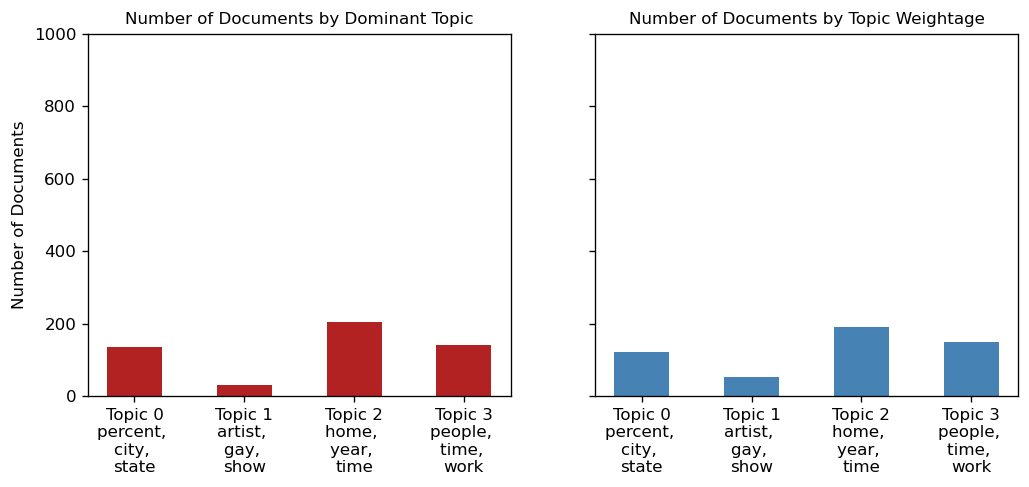

In [32]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [33]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 497 samples in 0.000s...
[t-SNE] Computed neighbors for 497 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 497 / 497
[t-SNE] Mean sigma: 0.119509
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.878487
[t-SNE] KL divergence after 1000 iterations: 0.430597


Loading BokehJS ...

In [35]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [41]:
# Visualize the topics
import os, pickle
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(4))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(4) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.123893  0.174903       1        1  36.096368
3     -0.056378  0.042652       2        1  29.303380
0     -0.109407 -0.218236       3        1  25.172381
1      0.289678  0.000681       4        1   9.427872, topic_info=         Term         Freq        Total Category  logprob  loglift
1165     city   904.000000   904.000000  Default  30.0000  30.0000
178     state   818.000000   818.000000  Default  29.0000  29.0000
650   percent  1003.000000  1003.000000  Default  28.0000  28.0000
2627   artist   300.000000   300.000000  Default  27.0000  27.0000
129    people  1358.000000  1358.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
973       man   102.804507   330.683340   Topic4  -5.4681   1.1932
912     black    88.985704   310.390043   Topic4  -5.6124   1.1121
432    mother    67.043199   251.983142   Topic4  -5.8956   1.0375
784     great    63.699840   329.160360   Topic4  -5.9467   0.7191
1653     star    53.925354   101.062704   Topic4  -6.1133   1.7334

[283 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
8848       3  0.022527  academy
8848       4  0.968640  academy
227        1  0.089371   accord
227        2  0.080061   accord
227        3  0.828543   accord
...      ...       ...      ...
223        3  0.179969     year
20025      1  0.059780     yeoh
20025      2  0.119559     yeoh
20025      3  0.035868     yeoh
20025      4  0.789091     yeoh

[442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])